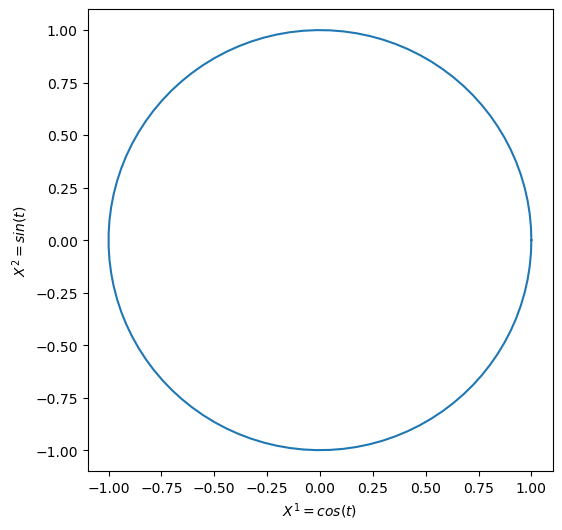

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

X = [
    lambda t:np.cos(t),
    lambda t:np.sin(t),
]
t = np.linspace(0,2*np.pi,100)
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("$X^1=cos(t)$")
ax.set_ylabel("$X^2=sin(t)$")
ax.plot(X[0](t),X[1](t))
plt.show()

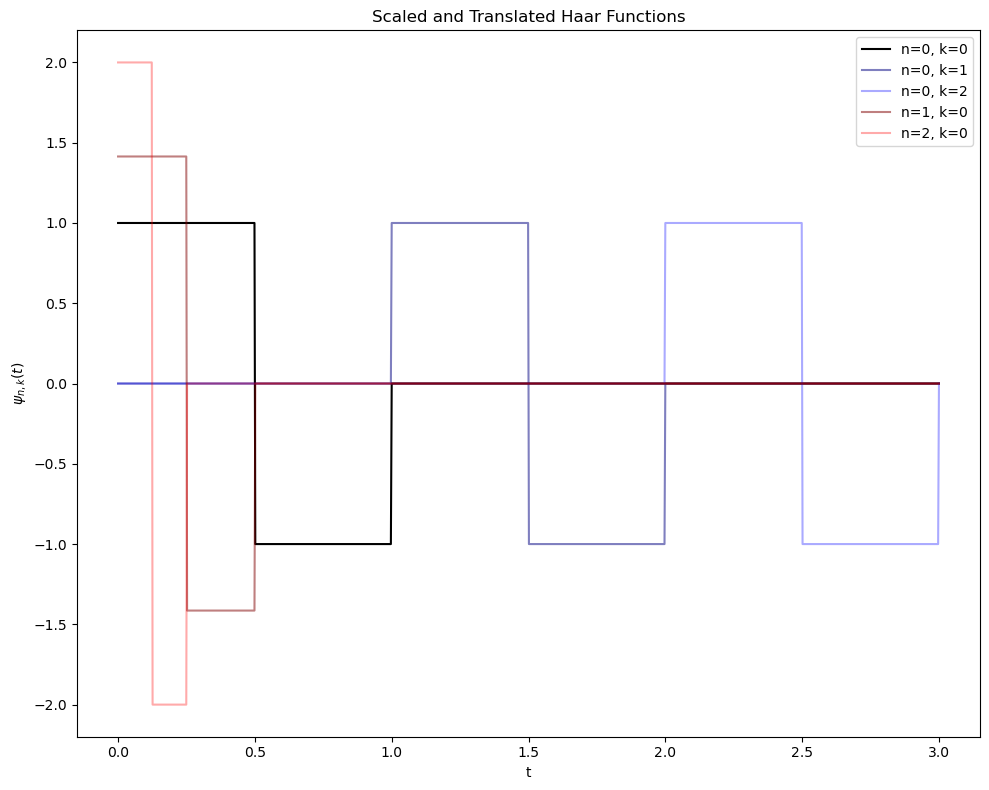

In [6]:
# Haar function
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd 

def haar_wavelet(t):
    result = np.zeros(len(t))
    result[(t >= 0) & (t < 1/2)] = 1
    result[(t >= 1/2) & (t<1)] = -1
    return result

def haar_scaled_translated(t, n, k):
    return 2**(n/2) * haar_wavelet(2**n * t - k)

ts = np.linspace(0, 3, 1000)

nks = [(0,0),(0,1),(0,2),(1,0),(2,0)]

def custom_colormap(n, k):
    red = n / 2.0
    blue = k / 2.0
    return (red, 0.0, blue)

# Create a plot
plt.figure(figsize=(10, 8))

# Plot the scaled and translated Haar functions
for (n, k) in nks:
    haar_st_values = haar_scaled_translated(ts, n, k)
    alpha = 1. / (n + k + 1) 
    linestyle = "-" if n+k == 0 else "--" if n+k == 1 else ":"
    plt.plot(ts, haar_st_values, label=f"n={n}, k={k}", color=custom_colormap(n, k),alpha=alpha, linestyle=linestyle)

# Annotate the plot
plt.title("Scaled and Translated Haar Functions")
plt.xlabel("t")
plt.ylabel("$\psi_{n,k}(t)$")
plt.legend()
plt.tight_layout()
plt.show()

cartesian line: 2.0*Piecewise((0, t < 0), (2.0*Min(0.5, t) - 1.0*Min(1, t), True)) for t over (-0.5, 2.5)
cartesian line: 2.0*Piecewise((0, t < 0), (-1.0*Min(1, t) + 2.0*Min(1.5, t) - 1.0*Min(2, t), True)) for t over (-0.5, 2.5)
cartesian line: 2.0*Piecewise((0, t < 0), (-1.0*Min(2, t) + 2.0*Min(2.5, t) - 1.0*Min(3, t), True)) for t over (-0.5, 2.5)
cartesian line: 2.82842712474619*Piecewise((0, t < 0), (2.82842712474619*Min(0.25, t) - 1.4142135623731*Min(1/2, t), True)) for t over (-0.5, 2.5)
cartesian line: 4.0*Piecewise((0, t < 0), (4.0*Min(0.125, t) - 2.0*Min(1/4, t), True)) for t over (-0.5, 2.5)


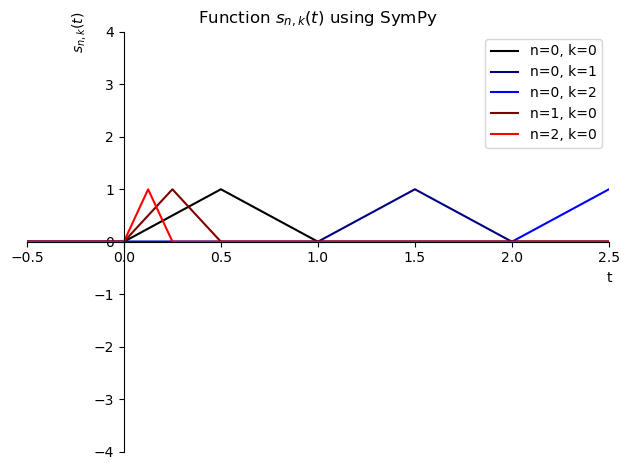

In [18]:
import sympy as sp

# Define symbolic variables
t, u = sp.symbols('t u')

# Define the Haar wavelet function symbolically
def haar_sym(u):
    return sp.Piecewise((1, (u >= 0) & (u < 0.5)), (-1, (u >= 0.5) & (u < 1)), (0, True))

# Define the scaled and translated Haar function
def haar_scaled_translated_sym(u, n, k):
    return 2**(n/2) * haar_sym(2**n * u - k)

# Define the s_nk function
def s_nk_sym(t, n, k):
    integrand = haar_scaled_translated_sym(u, n, k)
    return 2**(1 + n/2) * sp.integrate(integrand, (u, 0, t))

nk_values = [(0, 0), (0, 1), (0, 2), (1, 0), (2, 0)]

# Redefine the custom colormap
def custom_colormap(n, k):
    red = n / 2.0
    blue = k / 2.0
    return (red, 0, blue)

# Create a plot again
p = sp.plot(show=False, legend=True, xlim=(-0.5, 2.5), ylim=(-4, 4))

# Plot the functions for the specified n and k values
for (n, k) in nk_values:
    alpha = 1. / (n + k + 1) 
    linestyle = "-" if n+k == 0 else "--" if n+k == 1 else ":"
    p.extend(sp.plot(s_nk_sym(t, n, k), (t, -0.5, 2.5), line_color=custom_colormap(n, k), show=False, label=f"n={n}, k={k}", alpha=alpha, linestyle=linestyle))

p.title = "Function $s_{n,k}(t)$ using SymPy"
p.xlabel = "t"
p.ylabel = "$s_{n,k}(t)$"

for line in p:
    n, k = line.label.split(", ")
    n = int(n[-1])
    k = int(k[-1])
    if n + k == 1:
        line.line_style = "--"
        line.alpha = 0.5
    elif n + k == 2:
        line.line_style = ":"
        line.alpha = 0.25
    print(line)

p.show()


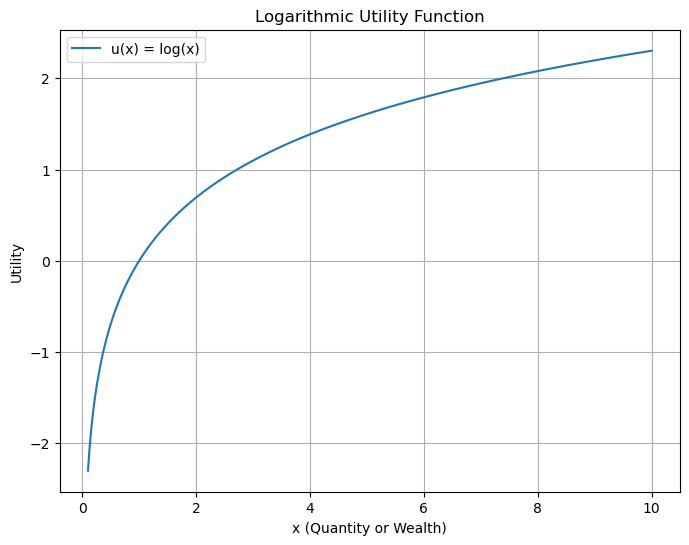

In [19]:
# Redefining the necessary variables and libraries, then plotting the logarithmic utility function

import numpy as np
import matplotlib.pyplot as plt

# Define the logarithmic utility function
x = np.linspace(0.1, 10, 400)
y = np.log(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='u(x) = log(x)')
plt.title('Logarithmic Utility Function')
plt.xlabel('x (Quantity or Wealth)')
plt.ylabel('Utility')
plt.legend()
plt.grid(True)
plt.show()


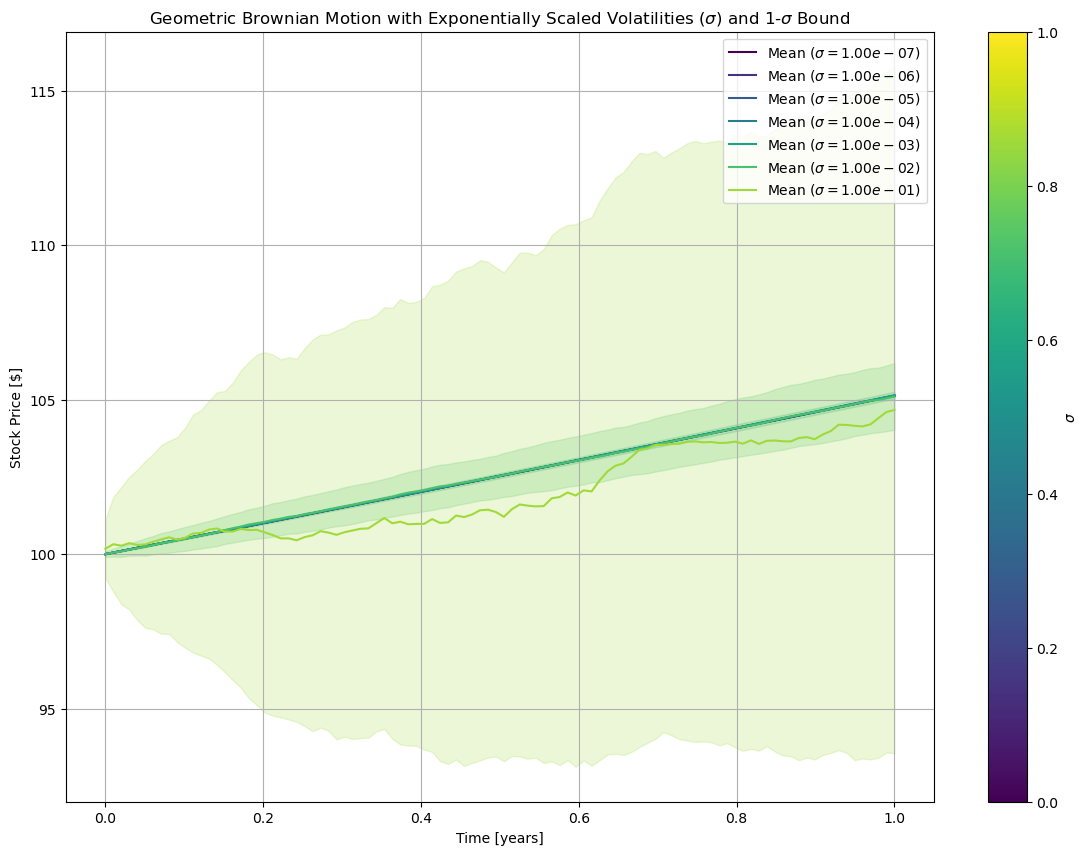

In [2]:
import numpy as np
import matplotlib.pyplot as plt
S0 = 100  # Initial stock price
mu = 0.05  # Drift
sigma = 0.2  # Volatility
T = 1  # Time period in years
dt = 0.01  # Time step
N = int(T / dt)  # Number of time steps
num_samples = 100
# Generate sigma values on an exponential scale using numpy, making sure the base is float
sigma_values = 10.0 ** np.arange(-7, 0, 1)

# Initialize figure
plt.figure(figsize=(14, 10))

# Generate and plot GBM paths for different sigma values
legend_labels = []  # For storing legend labels
for i, sigma in enumerate(sigma_values):
    # Initialize an array to store the paths
    S_samples = np.zeros((num_samples, N))
    
    # Generate 100 paths for each sigma
    for j in range(num_samples):
        W = np.random.normal(0, np.sqrt(dt), N)  # Standard normal random numbers
        W = np.cumsum(W)  # Cumulative sum to generate Brownian motion
        S_samples[j, :] = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # GBM formula
    
    # Calculate the mean and standard deviation of the paths at each time point
    mean_S = np.mean(S_samples, axis=0)
    std_S = np.std(S_samples, axis=0)
    
    # Plot the mean path
    color = plt.cm.viridis(i / len(sigma_values))
    plt.plot(t, mean_S, color=color)
    
    # Plot the 1-sigma bound
    plt.fill_between(t, mean_S - std_S, mean_S + std_S, color=color, alpha=0.2)
    
    # Add to legend labels
    legend_labels.append(f'Mean ($\sigma = {sigma:.2e}$)')

# Add title and labels
plt.title(f'Geometric Brownian Motion with $\mu = {mu}$ Exponentially Scaled Volatilities ($\sigma$) and 1-$\sigma$ Bound')
plt.xlabel('Time [years]')
plt.ylabel('Stock Price [$]')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='$\sigma$')
plt.legend(legend_labels)
plt.grid(True)

plt.show()
